In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("spam.csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [13]:
df["v1"].unique()

array(['ham', 'spam'], dtype=object)

In [15]:
df["v1"].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

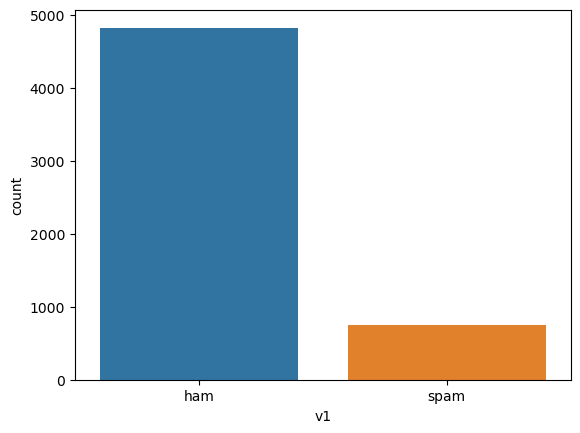

In [17]:
sns.countplot(data=df,x="v1",hue="v1")
plt.show()

In [18]:
x=df.pop("v2")

In [19]:
y=df
y

,v1
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


In [20]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# text=[]
# for i in x:
#     clean=re.sub("[^a-zA-Z ]","",i)
#     clean=clean.lower()
#     clean=word_tokenize(clean)
#     clean=[i for i in clean if i not in set(stopwords.words("english"))]
#     clean=[WordNetLemmatizer().lemmatize(i) for i in clean]
#     clean=" ".join(clean)
#     text.append(clean)

In [24]:
# text[:10]

In [27]:
# vector=TfidfVectorizer()
# vect=vector.fit_transform(text).toarray()

In [29]:
# vector.get_feature_names_out()

In [31]:
# cleaned=pd.DataFrame(vect,columns=vector.get_feature_names_out())

In [33]:
# y=y.replace({"ham":0,"spam":1})

In [175]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [177]:
x_train

708     To review and KEEP the fantastic Nokia N-Gage ...
4338                   Just got outta class gonna go gym.
5029    Is there coming friday is leave for pongal?do ...
4921    Hi Dear Call me its urgnt. I don't know whats ...
2592    My friend just got here and says he's upping h...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: v2, Length: 3900, dtype: object

In [179]:
y_train

,v1
708,spam
4338,ham
5029,ham
4921,ham
2592,ham
...,...
3772,ham
5191,ham
5226,ham
5390,ham


In [181]:
y_train.value_counts()

v1  
ham     3372
spam     528
Name: count, dtype: int64

In [183]:
from imblearn.over_sampling import RandomOverSampler
# x_over,y_over=RandomOverSampler().fit_resample([x_train],y_train)

In [185]:
# y_over.value_counts()

In [187]:
# from sklearn.naive_bayes import GaussianNB
# model=GaussianNB()
# model.fit(x_over,y_over)
# model

In [193]:
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
pipe=Pipeline([("tfidf",TfidfVectorizer(stop_words="english",max_features=2000)),
              ("over",RandomOverSampler()),
              ("model",BernoulliNB())])

In [197]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=2000, stop_words='english')),
                ('over', RandomOverSampler()), ('model', BernoulliNB())])

In [199]:
y_predict=pipe.predict(x_test)

In [211]:
y_predict

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [215]:
pipe.predict(["You are win a cash prize of 10000"])

array(['spam'], dtype='<U4')

In [201]:
from sklearn.metrics import classification_report,accuracy_score

In [203]:
report=classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1453
        spam       0.99      0.90      0.94       219

    accuracy                           0.99      1672
   macro avg       0.99      0.95      0.97      1672
weighted avg       0.99      0.99      0.99      1672



In [205]:
accuracy_score(y_test,y_predict)

0.9856459330143541

In [209]:
import pickle
with open("pipe.pkl","wb") as file:
    pickle.dump(pipe,file)

In [207]:
# from sklearn.naive_bayes import BernoulliNB
# bernoulli=BernoulliNB()
# bernoulli.fit(x_over,y_over)

NameError: name 'x_over' is not defined

In [30]:
# y_predict=bernoulli.predict(x_test)

In [31]:
# report=classification_report(y_test,y_predict)
# print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.98      0.89      0.93       219

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [32]:
# accuracy_score(y_test,y_predict)

0.9832535885167464

In [33]:
# from sklearn.ensemble import RandomForestClassifier
# random=RandomForestClassifier()
# # random.fit(x_over,y_over)

RandomForestClassifier()

In [34]:
# y_predict=random.predict(x_test)

In [35]:
# report=classification_report(y_test,y_predict)
# print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.99      0.84      0.91       219

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [36]:
# accuracy_score(y_test,y_predict)

0.9784688995215312

In [37]:
# from sklearn.ensemble import GradientBoostingClassifier
# grade=GradientBoostingClassifier()
# grade.fit(x_over,y_over)

GradientBoostingClassifier()

In [38]:
# y_predict=grade.predict(x_test)

In [39]:
# report=classification_report(y_test,y_predict)
# print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1453
           1       0.79      0.85      0.82       219

    accuracy                           0.95      1672
   macro avg       0.88      0.91      0.89      1672
weighted avg       0.95      0.95      0.95      1672



In [40]:
# accuracy_score(y_test,y_predict)

0.9503588516746412

In [91]:
# import speech_recognition as sr
# # Convert speech to text
# def voice(inp):
#     try:
#         text = r.recognize_google(audio)
#         return ("You said:", text)
#     except:
#         return ("Sorry, could not recognize your voice.")

# # Create recognizer
# r = sr.Recognizer()
# # Use the microphone
# with sr.Microphone() as source:
#     # r.adjust_for_ambient_noise(source)
#     print("Speak now...")
#     audio = r.listen(source)
# voice(audio)
# while voice(audio)=="Sorry, could not recognize your voice.":
#     r = sr.Recognizer()
    
#     # Use the microphone
#     with sr.Microphone() as source:
#         print("Speak now...")
#         audio = r.listen(source)
#     voice(audio)
# print(" ".join(voice(audio)))
# def cleaning(text):
#     value=[]
#     clean=re.sub("[^a-zA-Z ]","",text)
#     clean=clean.lower()
#     clean=word_tokenize(clean)
#     clean=[i for i in clean if i not in set(stopwords.words("english"))]
#     clean=[WordNetLemmatizer().lemmatize(i) for i in clean]
#     clean=" ".join(clean)
#     value.append(clean)
#     vect=vector.transform(value)
#     Single=bernoulli.predict(vect.toarray())
#     return "Not Spam" if Single[0]==0 else "Spam"
    
# cleaning(" ".join(voice(audio)))

Speak now...
You said: you want Rs 1000 in lottery


'Not Spam'

In [103]:
# from sklearn.pipeline import Pipeline
# pipe=Pipeline([("preprocess",import speech_recognition as sr
# # Convert speech to text
# def voice(inp):
#     try:
#         text = r.recognize_google(audio)
#         return ("You said:", text)
#     except:
#         return ("Sorry, could not recognize your voice.")

# # Create recognizer
# r = sr.Recognizer()
# # Use the microphone
# with sr.Microphone() as source:
#     # r.adjust_for_ambient_noise(source)
#     print("Speak now...")
#     audio = r.listen(source)
# voice(audio)
# while voice(audio)=="Sorry, could not recognize your voice.":
#     r = sr.Recognizer()
    
#     # Use the microphone
#     with sr.Microphone() as source:
#         print("Speak now...")
#         audio = r.listen(source)
#     voice(audio)
# print(" ".join(voice(audio)))
# def cleaning(text):
#     value=[]
#     clean=re.sub("[^a-zA-Z ]","",text)
#     clean=clean.lower()
#     clean=word_tokenize(clean)
#     clean=[i for i in clean if i not in set(stopwords.words("english"))]
#     clean=[WordNetLemmatizer().lemmatize(i) for i in clean]
#     clean=" ".join(clean)
#     value.append(clean)
#     vect=vector.transform(value)
#     Single=bernoulli.predict(vect.toarray())
#     return "Not Spam" if Single[0]==0 else "Spam"
    
# cleaning(" ".join(voice(audio))))])

SyntaxError: invalid syntax (883080097.py, line 2)

In [87]:
# " ".join(voice(audio))

'You said: join Jeet Ke Love 450% welcome bonus up to 35000'

In [73]:
# def cleaning(text):
#     value=[]
#     clean=re.sub("[^a-zA-Z ]","",text)
#     clean=clean.lower()
#     clean=word_tokenize(clean)
#     clean=[i for i in clean if i not in set(stopwords.words("english"))]
#     clean=[WordNetLemmatizer().lemmatize(i) for i in clean]
#     clean=" ".join(clean)
#     value.append(clean)
#     vect=vector.transform(value)
#     Single=bernoulli.predict(vect.toarray())
#     return "Not Spam" if Single[0]==0 else "Spam"
    
# cleaning(" ".join(voice(audio)))

'Not Spam'

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import scipy as sci
# import re
# import string
# import nltk
# from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import ElasticNet
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.svm import SVR
# from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import VotingClassifier
# from sklearn.ensemble import VotingRegressor
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import GradientBoostingRegressor
# import xgboost as xgb
# import catboost as cat
# import lightgbm as light
# from sklearn.cluster import KMeans
# from scipy.cluster import hierarchy
# from sklearn.cluster import DBSCAN
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# from sklearn.metrics import f1_score,accuracy_score,precision_score
# from nltk.tokenize import word_tokenize,sent_tokeniz]\745263+
# rom nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk.stem import PorterStemmer
# from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# !uv pip install SpeechRecognition

In [ ]:
# !uv pip install pyaudio

In [17]:
# df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
# pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer(lowercase=True, stop_words='english')),
#     ('model', MultinomialNB())
# ])

NameError: name 'Pipeline' is not defined